In [21]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read in mushroom .csv file to datafram
df = pd.read_csv("./mushrooms.csv")
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [19]:
#change to categorical data type 
for i in df.columns:
    df[i] = df[i].astype('category')
    print(df[i].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: count, dtype: int64
bruises
f    4748
t    3376
Name: count, dtype: int64
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
gill-attachment
f    7914
a     210
Name: count, dtype: int64
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
gill-size
b    5612
n    2512
Name: count, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: coun

In [85]:
#drop veil-type since there is only one category & stalk-root which has many unknown values
df.drop(columns='veil-type', inplace=True)
df.drop(columns='stalk-root', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-surface-above-ring  8124 non-null   int32
 12  stalk-surface-below-ring  8124 non-null   int32
 13  stalk-color-above-ring    8124 non-null   int32
 14  stalk-color-below-ring    8124 non-null 

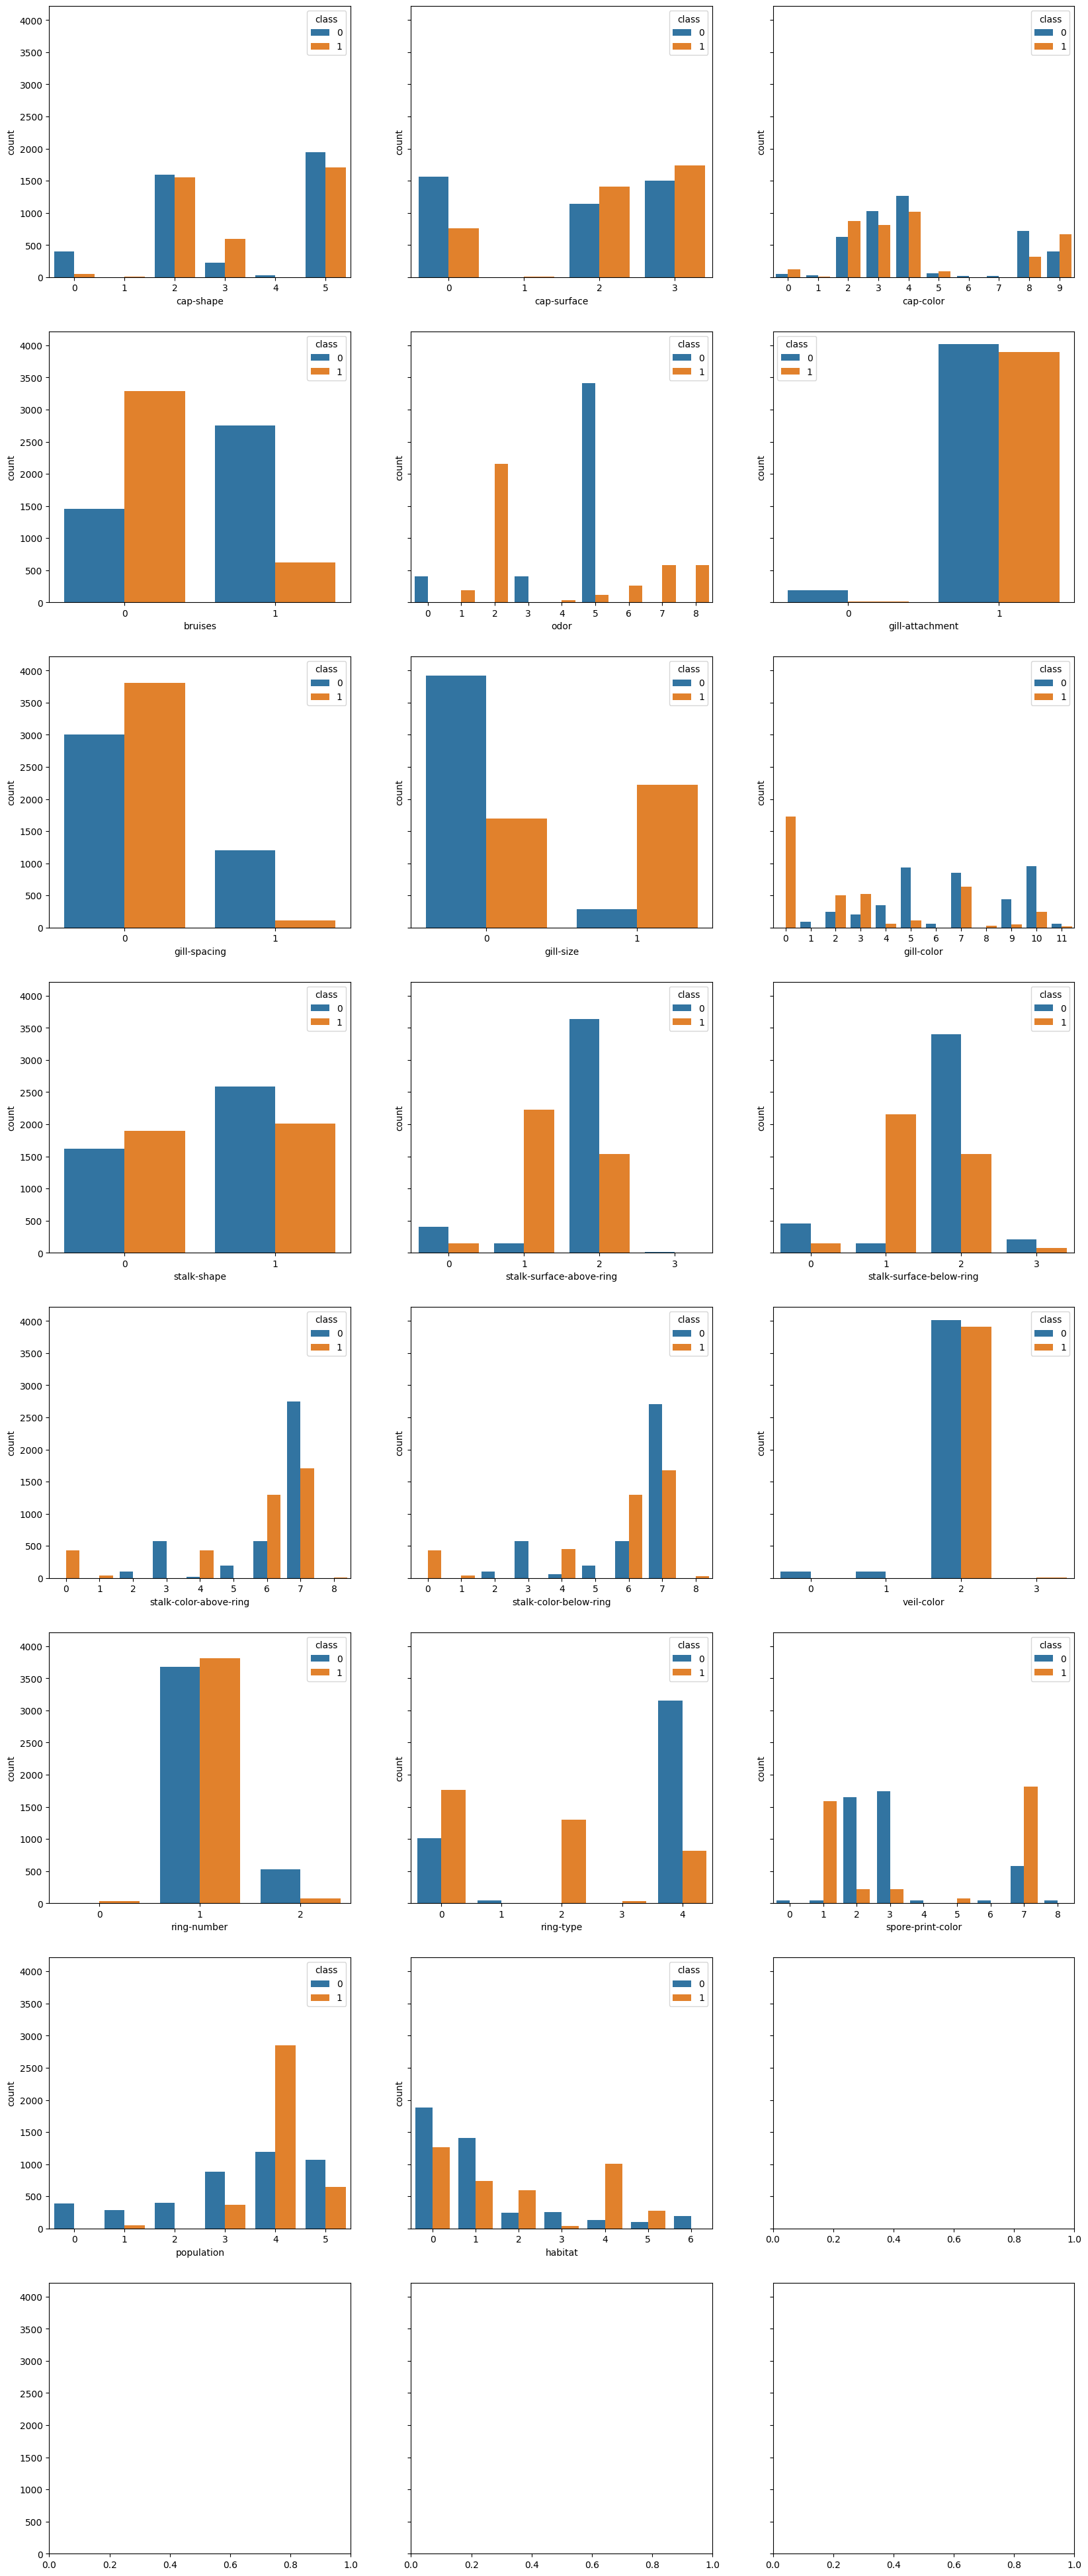

In [86]:
fig, axes = plt.subplots(nrows=8,ncols=3, figsize=(20,50),sharey=True)
idx=0
for c in df.columns[1:]:
    sns.countplot(data=df, x=c,hue='class',ax=axes[idx//3][idx%3])
    idx += 1

In [87]:
#encode category codes to numericals
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for c in df.columns:
    df[c] = encoder.fit_transform(df[c])

In [88]:
#create set of features, and set of classes of the dataset
X = df.iloc[:,1:]
y = df['class']

X.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,2,2,7,7,2,1,0,3,0,1


In [104]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)



In [90]:
KF = KFold(n_splits=5, shuffle=True)
reg = LogisticRegression(max_iter = 1000)
cv_results = cross_val_score(reg,X,y,cv=KF)
print(np.mean(cv_results))

0.9457161803713527


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)
scores = []
for alpha in [0.0001, 0.001, 0.01, 0.1, 1.0]:  
    lasso = Lasso(alpha=alpha)  
    lasso.fit(X_train, y_train)  
    lasso_pred = lasso.predict(X_test)  
    scores.append(lasso.score(X_test, y_test))
print(scores)


#ridge = Lasso(alpha=.0001)
#cv_results = cross_val_score(ridge,X,y,cv=KF)
#print(np.mean(cv_results))

[0.7353040927485741, 0.7337966937922764, 0.6981967036965804, 0.3566059760459802, -4.7396662150589464e-08]


In [91]:
svc_model = SVC()
cv_results = cross_val_score(svc_model,X,y,cv=KF)
print(np.mean(cv_results))

0.989291019325502


In [92]:
knn_model = KNeighborsClassifier(n_neighbors = 2)
cv_results = cross_val_score(knn_model,X.values,y.values,cv=KF)
print(np.mean(cv_results))

0.9990152330428191


In [93]:
rf = RandomForestClassifier()
cv_results = cross_val_score(rf,X,y,cv=KF)
print(np.mean(cv_results))

1.0
